In [1]:
#importing pandas to get started with the easy data source
import pandas as pd

In [2]:
#using pandas to put the data into a dataframe
df_ratings = pd.read_csv('twitter-archive-enhanced.csv')
df_ratings.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#imports for programmatic data download from Udacity library
import os
import requests

#creating folder to store responses from query
#folder_name = 'image_predictions'
#if not os.path.exists(folder_name):
#    os.makedirs(folder_name)
#url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [4]:
#collecting response and writing to a file so we can convert to a dataframe
#response = requests.get(url)
#with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
#        file.write(response.content)

#this file is seperated by tabs so we use sep='\t'
df_image_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
#now we have to make an array of the tweet IDs that coordinate to the ones we are seeking to be used on tweepy API
tweet_ids = df_ratings['tweet_id'].values
len(tweet_ids)

2356

In [6]:
#finally we query import necessary packages and set up communication with twitter to get retweets and favorite counts for our tweet ids
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'consumer key'
consumer_secret = 'secretsssssss'
access_token = 'token access value'
access_secret = 'shhh its secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids[0]

892420643555336193

In [7]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    #for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

IndentationError: unexpected indent (<ipython-input-7-182f57043429>, line 7)

In [8]:
#import to use reg expressions for parsing
import re

In [9]:
#opening file and reading all the lines into an array called row
file=open("tweet_json.txt",'r') 

row = file.readlines()
df_list = []

#now for each line I extract the desired data
for line in row:
    line = re.split('"id": ', line, 1)[1]
    id_num = re.split(',', line, 1)[0]
    line = re.split('"retweet_count": ', line, 1)[1]
    retweet_count = re.split(',', line, 1)[0]
    line = re.split('"favorite_count": ', line, 1)[1]
    favorite_count = re.split(',', line, 1)[0]
    df_list.append({'tweet_id': id_num,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})
    
#finally we write to a dataframe. 
df_retweets = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_retweets

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8058,37374
1,892177421306343426,5987,32132
2,891815181378084864,3955,24223
3,891689557279858688,8232,40677
4,891327558926688256,8912,38897
5,891087950875897856,2965,19557
6,890971913173991426,1957,11421
7,890729181411237888,17964,63009
8,890609185150312448,4061,26898
9,890240255349198849,7012,30831


# Assess
This section details my assessment of the data with regard to quality and tidiness. The general approach will be to assess with regard to the following definitnions of those terms.

Quality issues pertain to content. Low quality data is also known as dirty data. There are four dimensions of quality data:

**Completeness**: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?

**Validity**: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).

**Accuracy**: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.

**Consistency**: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

**Tidiness** issues pertain to structure. These structural problems generally prevent easy analysis. Untidy data is also known as messy data. The requirements for tidy data are:

Each variable forms a column.
Each observation forms a row.
Each type of observational unit forms a table.

# # Quality Assessment

I will start off by getting an idea of the data completeness. Tweet_id is a common key and will be the best value to join our data sets on, so we will start by looking at it's completeness.

**Completeness**

In [10]:
len(df_retweets.tweet_id), len(df_ratings.tweet_id), len(df_image_predictions.tweet_id)

(2333, 2356, 2075)

Our Image predictions data set has the fewest number of tweet ids so we will check below that all of the ids from that data set are in the other two.

However, we will see that not all of the ids in the image predictions set are in the retweets set from tweepy, this must mean that some have been deleted. So, to make our data complete we will only keep the tweet_id intersection of all three data sets.

In [11]:
#programmatically showing that not all of the ids from image_predictions are represented in the tweepy data but all are in the ratings data from udacity
print(str(df_image_predictions.tweet_id.isin(df_retweets.tweet_id).all()) + " " + str(df_ratings.tweet_id.isin(df_retweets.tweet_id).all()))

False False


**Validity**

There are a few items to consider here. Firstly, the rating system is a non-traditional one but always has a denominator of 10. This should be consistent throughout. 

In [12]:
df_ratings.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

There are clearly invalid values here, let's look at how many.

In [13]:
len(df_ratings[df_ratings['rating_denominator'] != 10])

23

Those definitely need fixed... Next, let's look at the numerators.

In [14]:
df_ratings.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

WHOA 1776 as a max?? I like dogs but that rating seems like an outlier. Furthermore, 75% of ratings are 12 or below and only the bottom 25% are below 10. Let's see how many have a rating above 18 and less than 3, these seem like abnormal ratings and may need investigation. 

In [15]:
len(df_ratings[df_ratings['rating_numerator'] > 18]), len(df_ratings[df_ratings['rating_numerator'] < 3])

(25, 20)

Finally, let's look at some of our confidence values for the ratings to see if they are logical

In [16]:
df_image_predictions.p1_conf.describe(), df_image_predictions.p2_conf.describe(), df_image_predictions.p3_conf.describe()

(count    2075.000000
 mean        0.594548
 std         0.271174
 min         0.044333
 25%         0.364412
 50%         0.588230
 75%         0.843855
 max         1.000000
 Name: p1_conf, dtype: float64, count    2.075000e+03
 mean     1.345886e-01
 std      1.006657e-01
 min      1.011300e-08
 25%      5.388625e-02
 50%      1.181810e-01
 75%      1.955655e-01
 max      4.880140e-01
 Name: p2_conf, dtype: float64, count    2.075000e+03
 mean     6.032417e-02
 std      5.090593e-02
 min      1.740170e-10
 25%      1.622240e-02
 50%      4.944380e-02
 75%      9.180755e-02
 max      2.734190e-01
 Name: p3_conf, dtype: float64)

This all appears normal with a max of one and no negative values.

**Accuracy**

Most of this data seems accurate or at least, given our knowledge, is impossible to say it is innacurate. However, some of the dog names entered are valid names by the schema but otherwise incorrect. Let's try to look at these:

In [17]:
len(df_ratings[df_ratings['name'] == 'a'])

55

Well... after reviewing the names there are quite a few in there that seem to be an error in the service. 'A' is of course a fine name for a dog, but I think this is more likely an error where the program collects the first word after "This is" and the name values in the table that start with a lowercase letter are mostly incorrect. Let's focus only on the ones with the name 'a' because this column won't be a focus of the analysis and we would likely need to write some program to look for lowercase starting letters in the name column. This isn't foolproof, however, and should be approached with caution. For now, let's just update the a's to 'none'

**Consistency**

Now let's look at our dfs again and make sure they make sense logically.

In [18]:
df_retweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null object
retweet_count     2333 non-null object
favorite_count    2333 non-null object
dtypes: object(3)
memory usage: 54.8+ KB


These values should definitely all be int64. We need to convert these.

In [19]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Nothing immediately apparent here, but we could consider clarifying a few things and make a categorical variable based upon whether the picture was classified as a dog or not a dog.

In [20]:
len(df_image_predictions[df_image_predictions['p1_dog'] == True]), len(df_image_predictions[df_image_predictions['p2_dog'] == True]), len(df_image_predictions[df_image_predictions['p3_dog'] == True])
#showing the number of dog predictions for each of the three predictions

(1532, 1553, 1499)

In [21]:
print("There are " + str(len(df_image_predictions.loc[(df_image_predictions.p1_dog == True) & (df_image_predictions.p2_dog == True) & (df_image_predictions.p3_dog == True)])) + " occurences where all 3 predictions are dogs and " +
str(len(df_image_predictions.loc[(df_image_predictions.p1_dog == False) & (df_image_predictions.p2_dog == False) & (df_image_predictions.p3_dog == False)])) + " occurences where all 3 predictions are not dogs."
)

There are 1243 occurences where all 3 predictions are dogs and 324 occurences where all 3 predictions are not dogs.


As you can see from that test, approx. 75% of our predictions are all dog or all not a dog. This could be represented categorically using the categories 'Dog', 'Not_a_dog', 'Mixed_prediction'

In [22]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

We should definitely convert timestamp and tetweeted_status_timestamp do a datetime data type.

# Tidiness 

we now need to check that there are no duplicated tweet ids in any of the dfs

In [23]:
df_retweets.tweet_id.duplicated().sum(), df_ratings.tweet_id.duplicated().sum(), df_image_predictions.tweet_id.duplicated().sum()

(0, 0, 0)

That looks good. Are all of our images unique? 

In [24]:
(df_image_predictions.tweet_id.nunique() == df_image_predictions.jpg_url.nunique())

False

Uh oh, that's not what we wanted to see! Let's do some investigation and see how many duplicates there are and if there's a fix.

In [25]:
(df_image_predictions.jpg_url.value_counts() == 2).sum(), df_image_predictions[df_image_predictions.jpg_url.duplicated(keep=False)].p1_conf.nunique(), df_image_predictions[df_image_predictions.jpg_url.duplicated(keep=False)].p2_conf.nunique(), df_image_predictions[df_image_predictions.jpg_url.duplicated(keep=False)].p3_conf.nunique()

(66, 66, 66, 66)

This code cell shows that 66 jpg_urls appear twice in the predictions df, meaning that they are included in more than one tweet. Investigation shows that these tweets can have different names and ratings associated with the same image.

However, what we have already learned indicates that the neural network produced identical results for both the duplicate and original photos, as would be expected.

The best way to handle is to consider that these datasets really describe two different observational units, tweets and images, and therefore two tables are required. This will remedy the fact that there are currently multiple rows that are part of the same observation. This follows the aforementioned tidiness definition.



The retweet info and ratings dfs can be consolidated into a single table for which the observational units are tweets. Image_predictions should be left independent, because the observational unit for it are images.

# Summary

Proposed Quality changes:
- keep only unique tweet_ids that are in retweets df and image_predictions df
- ensure every df has same number of entries
- adjust all rating denoms to be 10
- fix outlier rating numerators
- update all dogs named 'a' to 'None' for consistency
- convert all values from retweets df to int64
- make single column that is categorical to represent 'doggo' 'fluffer' 'puppo' 'pupper' distinction or 'none'
- convert timestamp columns in ratings df to datetime

Tidiness changes:
- consolidate retweets df and ratings df
- classify each prediction as 'dog' if all three predictions were True, 'not_a_dog' if all three predictions were false, and 'mixed_prediction' otherwise


# Cleaning

The following section will focus on making the changes discussed in the Assess section. To start, we need a clean copy to work on.

In [26]:
retweets_clean = df_retweets.copy()
ratings_clean = df_ratings.copy()
images_clean = df_image_predictions.copy()
retweets_clean.tweet_id.nunique(), ratings_clean.tweet_id.nunique(), images_clean.tweet_id.nunique()

(2333, 2356, 2075)

# Quality

**Define**

- change the datatypes in the retweets df to be int64 rather than object. We do this first so that we can later remove outlier tweet ids

**Code**

In [27]:
retweets_clean.tweet_id = retweets_clean.tweet_id.astype(int)
retweets_clean.favorite_count = retweets_clean.favorite_count.astype(int)
retweets_clean.retweet_count = retweets_clean.retweet_count.astype(int)

**Test**

In [28]:
retweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


**Define**
- reduce the dfs to contain only the intersection of tweet_ids for all sets


**Code**

In [29]:
#Selecting only tweet_ids found in images df
tweet_ids = images_clean.tweet_id.values

retweets_clean = retweets_clean[retweets_clean['tweet_id'].isin(tweet_ids)]

# Reduce set of tweets_to_keep to the intersection of the images_clean tweets and the retweets_clean tweets
tweet_ids = retweets_clean.tweet_id.values

ratings_clean = ratings_clean[ratings_clean['tweet_id'].isin(tweet_ids)]
images_clean = images_clean[images_clean['tweet_id'].isin(tweet_ids)]

**Test**

In [30]:
len(images_clean), len(ratings_clean), len(retweets_clean)

(2062, 2062, 2062)

**Define**

- some of the rating denominators are not ten but all should be out of ten. First we will check to make sure the tweet text contains the rating/10 format. We will remove the tweets that do not have that format and adjust the denom for those that do.

**Code**

In [31]:
#this line of code shows how many rows have text that do not contain the "/10" rating and then the number of rating_denominators not equal to ten
ratings_clean[~ratings_clean.text.str.contains('/10')].tweet_id.count(), len(ratings_clean[ratings_clean['rating_denominator'] != 10])

(13, 18)

In [32]:
tweets_to_remove = set(ratings_clean[~ratings_clean.text.str.contains('/10')].tweet_id)

ratings_clean = ratings_clean[~ratings_clean['tweet_id'].isin(tweets_to_remove)]
retweets_clean = retweets_clean[~retweets_clean['tweet_id'].isin(tweets_to_remove)]
images_clean = images_clean[~images_clean['tweet_id'].isin(tweets_to_remove)]

**Test**

Now we will check to see if the 13 shown earlier are removed.

In [33]:
ratings_clean[~ratings_clean.text.str.contains('/10')].tweet_id.count(), len(ratings_clean[ratings_clean['rating_denominator'] != 10])

(0, 5)

**Define**

- Now we will adjust the remaining incorrect rating_denominator rows to be 10.

**Code**

In [34]:
wrong_denoms = set(ratings_clean[ratings_clean.rating_denominator != 10].index)
for x in wrong_denoms:
    ratings_clean.at[x, 'rating_denominator'] = 10

**Test**

Check to see that there are no more rows with a denominator unequal to 10

In [35]:
len(ratings_clean[ratings_clean['rating_denominator'] != 10])

0

**Define**

- now we must fix the rating numerators in a similar way, where we will remove invalid tweets and fix valid ones.

**Code**

In [36]:
invalid = set()
valid = set()

for x in ratings_clean.index:
    index = int(ratings_clean.loc[x].text.find('/10'))
    try:
        numerator = int(ratings_clean.loc[x].text[index-2:index].strip())
    except:
        invalid.add(x)
        continue
    if numerator != ratings_clean.loc[x].rating_numerator:
        valid.add(x)

print('There are ' + str(len(invalid)) + ' to be removed and ' + str(len(valid)) + ' to be fixed.')

There are 7 to be removed and 8 to be fixed.


We now look through each of these individually to see which to keep and which to remove. The ones selected for removal were often not of dogs, had a negative or decimal rating, or were people trying to be silly.

The index of the tweets to drop is 2246, 45, 979, 2260, 1653, 2074

Some we chose to keep also fit the mentioned criteria but the given rating was not an outlier or in a strange format.

In [37]:
#set of tweets that cannot be fixed are removed in this cell
tweets_to_remove = set()
for x in [2246, 45, 979, 2260, 1653, 2074]:
    tweets_to_remove.add(ratings_clean.loc[x].tweet_id)

retweets_clean = retweets_clean[~retweets_clean['tweet_id'].isin(tweets_to_remove)]
ratings_clean = ratings_clean[~ratings_clean['tweet_id'].isin(tweets_to_remove)]
images_clean = images_clean[~images_clean['tweet_id'].isin(tweets_to_remove)]

#Show that 6 rows were removed after code
len(retweets_clean), len(ratings_clean), len(images_clean)

(2043, 2043, 2043)

In [38]:
#In this cell we fix the remaining incorrect numerators
for i in ratings_clean.index:
    index = int(ratings_clean.loc[i].text.find('/10'))
    try:
        numerator = int(ratings_clean.loc[i].text[index-2:index].strip('.').strip())
    except:
        invalid.add(i)
        continue
    if numerator != ratings_clean.loc[i].rating_numerator:
        ratings_clean.at[i, 'rating_numerator'] = numerator

**Test**

Now we make a new valid and invalid set and check that the criteria from before no longer exists

In [39]:
invalid_new = set()
valid_new = set()

for x in ratings_clean.index:
    index = int(ratings_clean.loc[x].text.find('/10'))
    try:
        numerator = int(ratings_clean.loc[x].text[index-2:index].strip())
    except:
        invalid.add(x)
        continue
    if numerator != ratings_clean.loc[x].rating_numerator:
        valid_new.add(x)

print('There are ' + str(len(invalid_new)) + ' to be removed and ' + str(len(valid_new)) + ' to be fixed.')

There are 0 to be removed and 0 to be fixed.


**Define**

Now that we have cleaned up the numerators we should check for outliers and if there are any we will remove them. Low ratings seem to be common in cases of users sending non-dog pictures etc. but let's make sure there aren't overwhelming amounts and let's make sure there aren't too many silly ratings that are abnormally high.

**Code**

In [40]:
ratings_clean.rating_numerator.describe()

count    2043.000000
mean       10.648067
std         2.632945
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        75.000000
Name: rating_numerator, dtype: float64

In [41]:
len(ratings_clean[ratings_clean['rating_numerator'] <= 2]), len(ratings_clean[ratings_clean['rating_numerator'] >= 18])

(14, 3)

I chose the less than 2 and greater than 18 to follow the rules of normality. 14 ratings from 0-2 inclusively is not ideal in terms of normal behavior but after investigating the text sent in the tweet, these ratings are correct. Let's look at the three that are greater than 18.

In [42]:
ratings_clean[ratings_clean['rating_numerator'] >= 18]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


looks like these are actually decimal ratings based upon the text. Let's remove them.

In [43]:
indexes_to_remove = [695, 763, 1712]
too_high_rating = set()

for x in indexes_to_remove:
    too_high_rating.add(ratings_clean.loc[x].tweet_id)

retweets_clean = retweets_clean[~retweets_clean['tweet_id'].isin(too_high_rating)]
ratings_clean = ratings_clean[~ratings_clean['tweet_id'].isin(too_high_rating)]
images_clean = images_clean[~images_clean['tweet_id'].isin(too_high_rating)]

**Test**

Now we confirm that our dfs are 3 records smaller.

In [44]:
len(retweets_clean), len(ratings_clean), len(images_clean)

(2040, 2040, 2040)

**Define**

- now we will look at the ratings df where dogs have the entered name of a and see if we can extract names from these if available, and update to none if they do not have a name

**Code**

In [45]:
#see how many have the name a
len(ratings_clean[ratings_clean['name'] == 'a'])

54

54 is quite a few. After assessing these visually it seems as though about half of them have a name stored in the tweet text somewhere. In order to programmatically fix these it would be very difficult and inconsistent so, since we won't be using this column for analysis, we will simply update the 'a' values to be 'None'

In [46]:
ratings_clean.name = ratings_clean.name.replace('a', 'None')

**Test**

confirm that all the dogs named 'a' are fixed.

In [47]:
len(ratings_clean[ratings_clean['name'] == 'a'])

0

**Define**

- check for duplicates in puppo, floofer, doggo, pupper and replace with numerical indicators
- make new column for none to indicate if no category was chosen
- define new column that contains categorical designation rather than 5 different ones

**Code**

In [48]:
ratings_clean.doggo = ratings_clean.doggo.replace('None', 0)
ratings_clean.doggo = ratings_clean.doggo.replace('doggo', 1)
ratings_clean.floofer = ratings_clean.floofer.replace('None', 0)
ratings_clean.floofer = ratings_clean.floofer.replace('floofer', 1)
ratings_clean.pupper = ratings_clean.pupper.replace('None', 0)
ratings_clean.pupper = ratings_clean.pupper.replace('pupper', 1)
ratings_clean.puppo = ratings_clean.puppo.replace('None', 0)
ratings_clean.puppo = ratings_clean.puppo.replace('puppo', 1)

In [49]:
#Making new column for none and checking number of rows with multiple inputs for category
ratings_clean['none'] = 1 - (ratings_clean.doggo + ratings_clean.floofer + ratings_clean.pupper + ratings_clean.puppo)
ratings_clean[ratings_clean.none == -1].tweet_id.count()

13

These 13 have multiple category distinctions and will be removed so that they do not complicate analysis

In [50]:
duplicated = set(ratings_clean[ratings_clean.none == -1].tweet_id)

retweets_clean = retweets_clean[~retweets_clean['tweet_id'].isin(duplicated)]
ratings_clean = ratings_clean[~ratings_clean['tweet_id'].isin(duplicated)]
images_clean = images_clean[~images_clean['tweet_id'].isin(duplicated)]

**Test**

in the below cell we will check that all the duplicated rows are removed and that all our dfs are the same length.

In [51]:
ratings_clean[ratings_clean.none == -1].tweet_id.count(), len(retweets_clean), len(ratings_clean), len(images_clean)

(0, 2027, 2027, 2027)

**Define**

- now we make a single column for the categories or 'dog_stage'

**Code**

In [52]:
#define dog stages
category = ['doggo', 'floofer', 'pupper', 'puppo', 'none']
#collect column names
ids = [x for x in list(ratings_clean.columns) if x not in category]

#here we use melt method to unpivot the df and 
ratings_clean = pd.melt(ratings_clean, id_vars = ids, value_vars = category, var_name='dog_stage')

#now to set up the df again with the new column and drop old columns
ratings_clean = ratings_clean[ratings_clean.value == 1]
ratings_clean.drop('value', axis=1, inplace=True)
ratings_clean.reset_index(drop=True, inplace=True);
ratings_clean.dog_stage = ratings_clean.dog_stage.astype('category')

**Test**

now we will check the length of the df to confirm it is the same and that the new column populated correctly

In [53]:
print(str(len(ratings_clean)))
ratings_clean.dog_stage.value_counts()

2027


none       1723
pupper      209
doggo        65
puppo        23
floofer       7
Name: dog_stage, dtype: int64

**Define**

- convert timestamp and retweeted_status_timestamp to datetime type

**Code**

In [54]:
ratings_clean.timestamp = pd.to_datetime(ratings_clean.timestamp)
ratings_clean.retweeted_status_timestamp = pd.to_datetime(ratings_clean.retweeted_status_timestamp)

**Test**

In [55]:
ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 14 columns):
tweet_id                      2027 non-null int64
in_reply_to_status_id         21 non-null float64
in_reply_to_user_id           21 non-null float64
timestamp                     2027 non-null datetime64[ns]
source                        2027 non-null object
text                          2027 non-null object
retweeted_status_id           71 non-null float64
retweeted_status_user_id      71 non-null float64
retweeted_status_timestamp    71 non-null datetime64[ns]
expanded_urls                 2027 non-null object
rating_numerator              2027 non-null int64
rating_denominator            2027 non-null int64
name                          2027 non-null object
dog_stage                     2027 non-null category
dtypes: category(1), datetime64[ns](2), float64(4), int64(3), object(4)
memory usage: 208.1+ KB


# Tidiness


**Define**
- Start by classifying each image as having been predicted to be dog (if all three predicitons were dogs), mixed_prediction (if the predictions included both dog and non-dog predictions), and not_dog (if all three predictions were not dogs).

**Code**

In [56]:
#convert boolean to int so it can be used for grouping
images_clean.p1_dog = images_clean.p1_dog.astype(int)
images_clean.p3_dog = images_clean.p3_dog.astype(int)
images_clean.p2_dog = images_clean.p2_dog.astype(int)
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2027 non-null int64
jpg_url     2027 non-null object
img_num     2027 non-null int64
p1          2027 non-null object
p1_conf     2027 non-null float64
p1_dog      2027 non-null int64
p2          2027 non-null object
p2_conf     2027 non-null float64
p2_dog      2027 non-null int64
p3          2027 non-null object
p3_conf     2027 non-null float64
p3_dog      2027 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 205.9+ KB


In [57]:
#make a new column to store the prediction category
images_clean['prediction'] = images_clean.p1_dog + images_clean.p2_dog + images_clean.p3_dog

#now convert from numeric value to categorical value
images_clean['prediction'] = images_clean['prediction'].replace(3, 'dog')
images_clean['prediction'] = images_clean['prediction'].replace(2, 'mixed_prediction')
images_clean['prediction'] = images_clean['prediction'].replace(1, 'mixed_prediction')
images_clean['prediction'] = images_clean['prediction'].replace(0, 'not_dog')

**Test**

In [58]:
images_clean.prediction.value_counts()

dog                 1210
mixed_prediction     499
not_dog              318
Name: prediction, dtype: int64

**Define**

- Combine the ratings and retweets dfs on tweet ids

**Code**

In [59]:
ratings_final_clean = pd.merge(retweets_clean, ratings_clean, on='tweet_id', how='outer')

**Test**

In [60]:
ratings_final_clean.shape, retweets_clean.shape, ratings_clean.shape

((2027, 16), (2027, 3), (2027, 14))

In [61]:
print(ratings_final_clean[ratings_final_clean['tweet_id'] == 892420643555336193].name)
print(ratings_clean[ratings_clean['tweet_id'] == 892420643555336193].name)
print(ratings_final_clean[ratings_final_clean['tweet_id'] == 892420643555336193].retweet_count)
print(retweets_clean[retweets_clean['tweet_id'] == 892420643555336193].retweet_count)

0    Phineas
Name: name, dtype: object
304    Phineas
Name: name, dtype: object
0    8058
Name: retweet_count, dtype: int64
0    8058
Name: retweet_count, dtype: int64


**Define**

- let's drop a few unneccessary columns

**Code**

In [62]:
ratings_final_clean.head()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,8058,37374,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none
1,892177421306343426,5987,32132,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,none
2,891815181378084864,3955,24223,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,none
3,891689557279858688,8232,40677,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,none
4,891327558926688256,8912,38897,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,none


In [63]:
cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id']
for x in cols:
    ratings_final_clean.drop(x, axis=1, inplace=True)
ratings_final_clean.head()

,tweet_id,retweet_count,favorite_count,timestamp,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,8058,37374,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none
1,892177421306343426,5987,32132,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,none
2,891815181378084864,3955,24223,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,none
3,891689557279858688,8232,40677,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,none
4,891327558926688256,8912,38897,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,none


**Define**

- remove unneeded columns from images df

**Code**

In [65]:
new_cols = ['img_num', 'p1_dog', 'p2_dog', 'p3_dog', 'p1', 'p2', 'p3']
for x in new_cols:
    images_clean.drop(x, axis=1, inplace=True)

**Test**

In [66]:
images_clean.head()

,tweet_id,jpg_url,p1_conf,p2_conf,p3_conf,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,0.465074,0.156665,0.061428,dog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,0.506826,0.074192,0.072010,dog
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,0.596461,0.138584,0.116197,dog
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,0.408143,0.360687,0.222752,dog
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,0.560311,0.243682,0.154629,dog


# Store CSVs

In [67]:
ratings_final_clean.to_csv('twitter_archive_master.csv')
images_clean.to_csv('image_predictions_master.csv')

# Visualizations and Insights

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.patches.Wedge at 0x7f172e2eefd0>,
 [Text(-2.09876,-0.659701,'Dog'),
  Text(2.16111,-0.411837,'Mixed Prediction'),
  Text(1.04092,1.93816,'Not a Dog')],
 [Text(-1.14478,-0.359837,'59.7%'),
  Text(1.17879,-0.224638,'24.6%'),
  Text(0.567777,1.05718,'15.7%')])

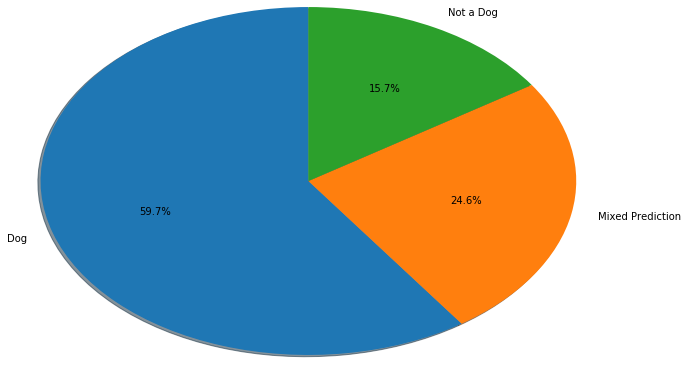

In [69]:
#start by looking at the different sizes of the dog prediction category and then display in pie chart
wedges_names = ['Dog', 'Mixed Prediction', 'Not a Dog']
wedges_size = [1210, 499, 318]
wedge_percentages = [str(100*1210/(1210+499+319)), str(100*499/(1210+499+319)), str(100*319/(1210+499+319))]
plt.pie(x=wedges_size, labels=wedges_names, autopct='%1.1f%%', radius=2, startangle=90, shadow=True)

**Insight**

With the criteria we set for these groupings it is surprising that 40% of the images sent into a dog rating site are predicted to be not a dog in at least 1 of the three predictions from the algorithm

Next lets look at the ratings for the dogs when compared to their favorite counts and retweet counts

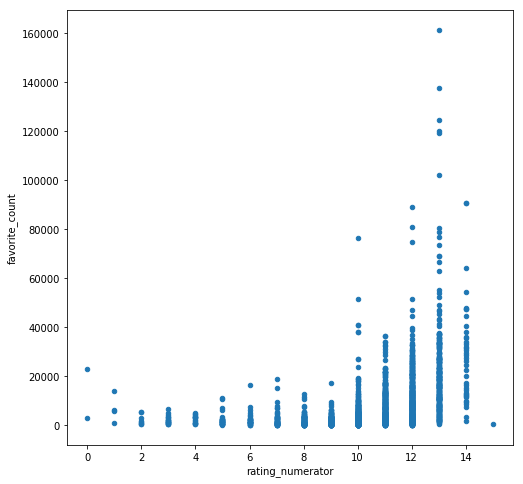

In [70]:
ratings_final_clean.plot.scatter(x='rating_numerator', y='favorite_count', figsize=(8,8))

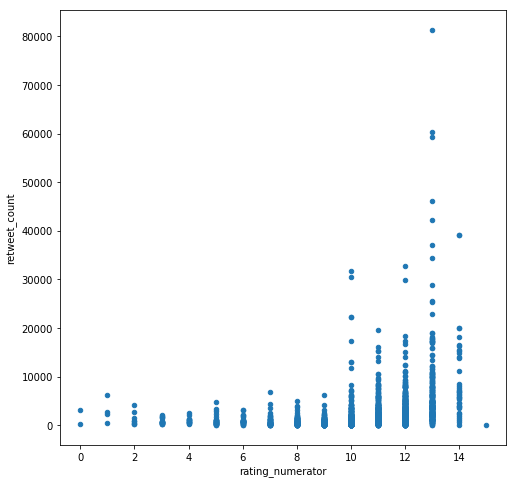

In [71]:
ratings_final_clean.plot.scatter(x='rating_numerator', y='retweet_count', figsize=(8,8))

***Insight***

As should be expected when the ratings were given, a higher rating ultimately leads to more retweets and favorites given to an image

**Insight**

Interestingly these patterns are very exponential in shape. This is probably because over time if a tweet is not favorited or liked then it gets less visibility.